## Setting up our Environment/Imports

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("glpsol") or os.path.isfile("glpsol")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("glpsol") or os.path.isfile("glpsol"))

from pyomo.environ import *

SOLVER = 'glpk'
EXECUTABLE = '/usr/bin/glpsol'

     |████████████████████████████████| 9.5MB 3.8MB/s 
     |████████████████████████████████| 256kB 50.1MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 163kB 54.5MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-

## Project Details

# Introduction

Past two decades have ushered in a great deal of technological advancements in every walk of life which has made options of available food unlimited and has limited the amount of physcial activity that we perform in turn having huge detrimental impact on health. We have to carefully curtail our diet to not to exceed the safe limits and satisfy our culinery desires.

**Why dont we apply to optimization algorithms to our dietary concerns??**

This is the question we have asked ourselves and were able to accomplish satisfactory results which suggest a diet that acheives a good balance. We had included all the important parameters for having proper nutrient content in food for ex:- Fat, Calories, Carbs, Fiber etc into our model. 

As per FDA website, We can succesfully categorize an individual based on their age and the amount of physical activity they perform and suggest appropriate dietary limits for various nutirents based on their category. 

We have leveraged these limits to set the constraints and build a model which achieves a good balance


### Column Descriptions
* **Combined Name:** Concatenated form of Product Type (name of table on website) and Item. This gives us a unique name for each item.
* **Calories:** in grams
* **Fat:** in grams
* **Saturated Fat:** in grams
* **Trans Fat:** in grams
* **Cholesterol:** in grams; converted from milligrams. Mg/1000
* **Sodium:** in grams; converted from milligrams. Mg/1000
* **Carbs:** in grams, assumption
* **Fiber:** in grams, assumption
* **Sugars:** in grams
* **Protein:** in grams
* **Weight Watchers Pnts:** New column added with values calculated using given Weight Watchers formula
* **Weight Watchers Pnts_old:** Points as given in the Nutrition Charts link, which were incorrect


### Data Clean-up
* Removed ® character from Column Name. Just in case Python doesn’t like it. Removed 272 occurrences.
* Changed <1 to 0.5
* Changed <5 to 2.5. 7 occurrences
* Changed values of the column 'Cholesterol' from milligrams to grams for consistency
* Changed values of the column 'Sodium' from milligrams to grams
* Calculated Weight Watcher points using the given formula, since the points listed in the Nutrition-Charts link were incorrect.

  p=(c/50) + (f/12) - (min{r,4}/5)

  where,
    * P is points
    * C is calories
    * F is fat
    * R is dietary fiber

### Nutrient details by person

As iterated earlier, we have chosen the limits based upon the information listed on US government's FDA website. We had selected Calories, Fat,Saturated Fat
Cholesterol, Sodium, Carbs, Fiber, Sugars, Protein as important metrics for diet after going through various sources which suggest list of must have nutrients in any diet for physical well being. These sources are harvard health website, medical news today, webmd etc


Data from FDA.gov

| | Male	| Female | Female2 | Male2 | Total - UL | LL 1st Model	| LL 2nd Model
--- | --- | --- | --- | --- | --- | --- | ---
Age | 41-25 | 36-40 | 21-25 | 19-20
Activity Level | Moderate | Moderate | Active | Active			
Calories | 2,600 | 2,000 | 2,400 | 3,000 | 10,000 | 4,800 | 8,000
Fat (g)| 92 | 72 | 85 | 111 | 360 | | 288
Saturated Fat (g) | 23 | 18 | 21.4 | 27.5 | 89.9		
Trans Fat (g) | 1.04 | 0.81 | 0.95 | 1.31 | 4.11		
Cholesterol (g) | 0.274 | 0.232 | 0.268 | 0.293 | 1.067 		
Sodium (g) | 2.210 | 1.685 | 2.078 | 2.368 | 8.341 		
Carbs | 343 | 259 | 313 | 394 | 1,309		
Fiber | 43 | 31 | 38 | 49 | 161		
Sugars (g) | | | | | 200		
Proteins (g) | 114 | 89 | 108 | 122 | 433 | | 346.4

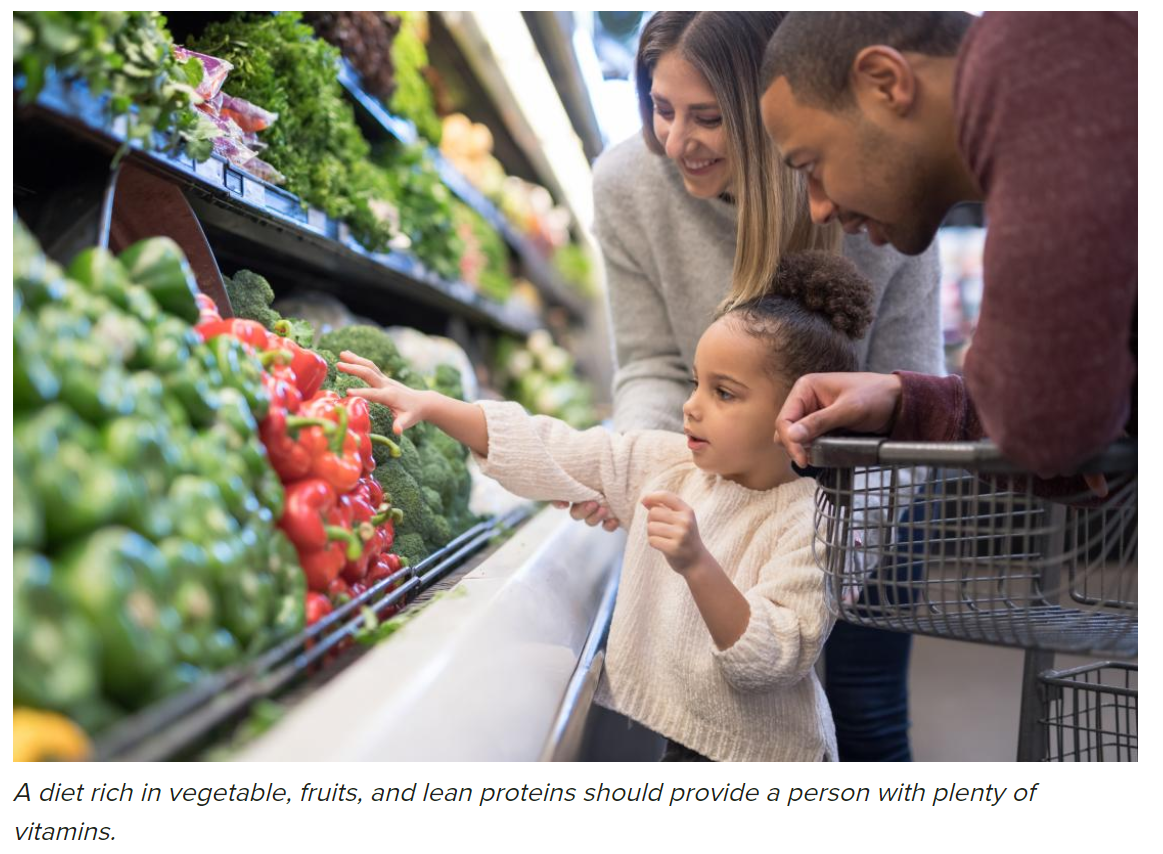

## Loading the Dataset


### Reading the file

In [ ]:
# Read data from Excel file
from google.colab import files
# Command to upload file
uploaded = files.upload()

Saving KFC Food DATA_Updated_v2.csv to KFC Food DATA_Updated_v2.csv


### Extracting data from the file

In [ ]:
import pandas as pd
import io

# Transform excel file in a pandas dataframe
df = pd.read_csv('KFC Food DATA_Updated_v2.csv') 
print(df)

                                         Combined Name  ...  Weight Watchers Pnts_old
0        Limited Time Offers_Cinnabon Dessert Biscuits  ...                     310.0
1               ORIGINAL RECIPE CHICKEN_Chicken Breast  ...                     355.0
2            ORIGINAL RECIPE CHICKEN_Chicken Drumstick  ...                     119.5
3                ORIGINAL RECIPE CHICKEN_Chicken Thigh  ...                     265.5
4           ORIGINAL RECIPE CHICKEN_Chicken Whole Wing  ...                     122.0
..                                                 ...  ...                       ...
213            BEVERAGES_Wild Cherry Pepsi  (30 fl oz)  ...                     495.0
214  REGIONAL MENU ITEMS_Country Fried Steak withou...  ...                     354.0
215  REGIONAL MENU ITEMS_Country Fried Steak with P...  ...                     384.0
216                  REGIONAL MENU ITEMS_KFC  Gizzards  ...                     282.0
217                    REGIONAL MENU ITEMS_KFC  Livers

In [ ]:
# Printing the first 10 rows of the data frame to verify the column names
df.head(n=10)

,Combined Name,Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (g),Sodium (g),Carbs,Fiber,Sugars (g),Protein (g),Weight Watchers Pnts,Weight Watchers Pnts_old
0,Limited Time Offers_Cinnabon Dessert Biscuits,290,13.0,7.0,0,0.00,0.58,40,2.0,17,4,6.483333,310.0
1,ORIGINAL RECIPE CHICKEN_Chicken Breast,390,21.0,4.0,0,0.12,1.19,11,2.0,0,39,9.150000,355.0
2,ORIGINAL RECIPE CHICKEN_Chicken Drumstick,130,8.0,1.5,0,0.06,0.43,4,1.0,0,12,3.066667,119.5
3,ORIGINAL RECIPE CHICKEN_Chicken Thigh,280,19.0,4.5,0,0.10,0.91,8,1.0,0,19,6.983333,265.5
4,ORIGINAL RECIPE CHICKEN_Chicken Whole Wing,130,8.0,2.0,0,0.06,0.38,3,0.0,0,10,3.266667,122.0
5,Plain Chicken_Chicken Breast,770,60.0,10.0,0,0.11,1.53,21,1.0,1,35,20.200000,746.0
6,Plain Chicken_Chicken Drumstick,250,21.0,3.5,0,0.05,0.53,6,1.0,0,11,6.550000,242.5
7,Plain Chicken_Chicken Thigh,500,40.0,7.0,0,0.10,0.97,11,1.0,1,22,13.133333,486.0
8,Plain Chicken_Chicken Whole Wing,290,25.0,4.0,0,0.05,0.52,6,1.0,1,10,7.683333,285.0
9,Plain Chicken_Breast,260,12.0,3.0,0,0.13,0.79,1,0.0,0,38,6.200000,225.0


In [ ]:
df.shape # Verifying the no of rows and columns

(218, 13)

In [ ]:
df.info() # Printing summary statistics 
# The dataset has 218 rows and 12 columns. And all the columns have non-null values for each of their 
# 218 rows. Therefore there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Combined Name             218 non-null    object 
 1   Calories                  218 non-null    int64  
 2   Fat (g)                   218 non-null    float64
 3   Saturated Fat (g)         218 non-null    float64
 4   Trans Fat (g)             218 non-null    int64  
 5   Cholesterol (g)           218 non-null    float64
 6   Sodium (g)                218 non-null    float64
 7   Carbs                     218 non-null    int64  
 8   Fiber                     218 non-null    float64
 9   Sugars (g)                218 non-null    int64  
 10  Protein (g)               218 non-null    int64  
 11  Weight Watchers Pnts      218 non-null    float64
 12  Weight Watchers Pnts_old  218 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 22.3+ KB


In [ ]:
# Now, in order to extract data from the spreadsheet, business as usual operations using dataframes

# List of Menu Item indices 
menuItems = df.index.values.tolist()
print(menuItems)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217]


In [ ]:
# Extract list of menu items, use transpose operation, and create dictionary index->menu item name
menuItem_name =  df["Combined Name"].T.to_dict()
print(menuItem_name)

{0: 'Limited Time Offers_Cinnabon Dessert Biscuits', 1: 'ORIGINAL RECIPE CHICKEN_Chicken Breast', 2: 'ORIGINAL RECIPE CHICKEN_Chicken Drumstick', 3: 'ORIGINAL RECIPE CHICKEN_Chicken Thigh', 4: 'ORIGINAL RECIPE CHICKEN_Chicken Whole Wing', 5: 'Plain Chicken_Chicken Breast', 6: 'Plain Chicken_Chicken Drumstick', 7: 'Plain Chicken_Chicken Thigh', 8: 'Plain Chicken_Chicken Whole Wing', 9: 'Plain Chicken_Breast', 10: 'Plain Chicken_Drumstick', 11: 'Plain Chicken_Thigh', 12: 'Plain Chicken_Whole Wing', 13: 'Plain Chicken_Breast', 14: 'Plain Chicken_Drumstick', 15: 'Plain Chicken_Thigh', 16: 'Plain Chicken_Whole Wing', 17: 'EXTRA CRISPY CHICKEN_Chicken Breast', 18: 'EXTRA CRISPY CHICKEN_Chicken Drumstick', 19: 'EXTRA CRISPY CHICKEN_Chicken Thigh', 20: 'EXTRA CRISPY CHICKEN_Chicken Whole Wing', 21: 'KENTUCKY GRILLED CHICKEN_Breast', 22: 'KENTUCKY GRILLED CHICKEN_Drumstick', 23: 'KENTUCKY GRILLED CHICKEN_Thigh', 24: 'KENTUCKY GRILLED CHICKEN_Whole Wing', 25: 'SPICY CRISPY CHICKEN_Breast', 26: '

In [ ]:
# The command below gives us the list of column names
print(list(df))

# Extract columns with values, transform column in list
wwPoints = df["Weight Watchers Pnts"].tolist()
print("Weight Watchers Pnts",wwPoints)

['Combined Name', 'Calories', 'Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (g)', 'Sodium (g)', 'Carbs', 'Fiber', 'Sugars (g)', 'Protein (g)', 'Weight Watchers Pnts', 'Weight Watchers Pnts_old']
Weight Watchers Pnts [6.483333332999999, 9.15, 3.066666667, 6.983333332999999, 3.266666667, 20.2, 6.55, 13.13333333, 7.683333332999999, 6.2, 2.5, 4.6, 2.3, 13.73333333, 4.766666667, 10.06666667, 4.65, 13.51666667, 4.4, 8.516666667, 4.483333333, 4.783333333, 1.9333333330000002, 3.75, 1.65, 8.466666667, 3.066666667, 6.8666666670000005, 3.066666667, 6.266666667000001, 5.6333333329999995, 2.583333333, 2.5, 3.516666667, 2.1, 7.183333332999999, 15.25, 3.083333333, 4.066666667, 3.6, 1.041666667, 0.0, 4.85, 3.1, 3.4666666669999997, 2.291666667, 2.775, 8.733333333, 7.05, 1.041666667, 16.21666667, 15.83333333, 4.966666667, 0.8, 11.91666667, 11.93333333, 9.65, 12.75, 31.36666667, 19.33333333, 5.008333333, 7.05, 7.416666667, 7.45, 8.183333333, 15.71666667, 11.3, 12.15, 12.18333333, 13.36666

In [ ]:
# List of nutrients - Remove first element (menu item) and last element (weight watcher points), as they are not nutrients!
nutrients = list(df)[1:11]
print("nutrients",nutrients)

# Extract nutritional content
nut_content = dict()
for nutrient in nutrients:
  nut_content[nutrient] = df[nutrient].tolist()

print("nutrition content", nut_content)

nutrients ['Calories', 'Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (g)', 'Sodium (g)', 'Carbs', 'Fiber', 'Sugars (g)', 'Protein (g)']
nutrition content {'Calories': [290, 390, 130, 280, 130, 770, 250, 500, 290, 260, 100, 180, 90, 540, 190, 390, 180, 530, 170, 330, 170, 210, 80, 150, 70, 350, 130, 270, 120, 260, 220, 100, 100, 130, 80, 290, 620, 190, 180, 170, 70, 25, 210, 140, 140, 110, 130, 340, 320, 70, 830, 640, 280, 80, 540, 480, 460, 590, 1200, 840, 280, 300, 310, 320, 340, 650, 470, 500, 510, 540, 630, 350, 620, 720, 740, 270, 40, 15, 160, 35, 260, 15, 60, 230, 300, 220, 300, 300, 120, 270, 300, 45, 35, 35, 110, 30, 30, 90, 5, 130, 35, 80, 150, 90, 45, 140, 190, 240, 350, 880, 140, 170, 230, 290, 430, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 140, 190, 240, 360, 80, 110, 140, 210, 0, 0, 5, 10, 80, 100, 130, 190, 80, 110, 130, 200, 0, 0, 0, 0, 160, 210, 260, 400, 160, 220, 270, 410, 150, 200, 260, 380, 120, 160, 220, 270, 410, 140, 190, 240, 3

In [ ]:
# Verifying the length of the lists that we have created

print ("Number of menuItems = ", len(menuItems))
print ("Number of elements in menuItem_name = ", len(menuItem_name))
print ("Number of elements in wwPoints = ", len(wwPoints))

Number of menuItems =  218
Number of elements in menuItem_name =  218
Number of elements in wwPoints =  218


In [ ]:
# Verifying the length of all nutrient lists

print ("Number of elements in nutrients = ", len(nutrients))
for k, v in nut_content.items():
   print("Number of enteries in", k,":", len(v))

Number of elements in nutrients =  10
Number of enteries in Calories : 218
Number of enteries in Fat (g) : 218
Number of enteries in Saturated Fat (g) : 218
Number of enteries in Trans Fat (g) : 218
Number of enteries in Cholesterol (g) : 218
Number of enteries in Sodium (g) : 218
Number of enteries in Carbs : 218
Number of enteries in Fiber : 218
Number of enteries in Sugars (g) : 218
Number of enteries in Protein (g) : 218


## First Model

**Defining the Objective Function**

$WeightWatcherPoints = 6.48cdb + 9.15ocb + 3.06ocd$ **...**   `objective function`

where,
each variable is a KFC menu item, 
for instance 

* cdb is Cinnabon Dessert Biscuits
* ocb is Original Chicken Breast
* ocd is Original Chicken Drumstick and so on.


**Defining the Constraints**

$Min(W) = 6.48cdb + 9.15ocb + 3.06ocd$ **...**

subject to:
* $290cdb + 390ocb + 130ocd >= 4800$		`(Calories lower limit)`	
* $290cdb + 390ocb + 130ocd <= 10000$		`(Calories upper limit)`
* $13cdb + 21ocb + 8ocd >= 0$			`(Fat lower limit)`
* $13cdb + 21ocb + 8ocd <= 360$			`(Fat upper limit)`
* $7cdb + 4ocb + 1.5ocd >= 0$			`(Saturated Fat)`
* $0cdb + 0ocb + 0ocd >= 0$			`(Trans Fat)`
* $0cdb + 0.12ocb + 0.06ocd >= 0$		`(Cholesterol)`	
* $0.58cdb + 1.19ocb + 0.43ocd >= 0.001$	`(Sodium lower limit)`	
* $0.58cdb + 1.19ocb + 0.43ocd <= 8.341$	`(Sodium upper limit)`	
* $40cdb + 11ocb + 4ocd >= 0$			`(Carbs lower limit)`
* $40cdb + 11ocb + 4ocd <= 1309$			`(Carbs upper limit)`
* $2cdb + 2ocb + 1ocd >= 0$			`(Fiber)`
* $17cdb + 0ocb + 0ocd >= 0$	`(Sugars lower limit)`		
* $17cdb + 0ocb + 0ocd <= 200$	`(Sugars upper limit)`	
* $4cdb + 39ocb + 12ocd >= 0$		`(Protein)`
* $cdb,ocb,ocd... \in \mathbb{R}^+$ `(Domains)

### Declare model, decision variables, and objective function

In [ ]:
# declaring the model
model = ConcreteModel()

# declaring the decision variables
model.meal = Var(menuItems,domain=Integers, bounds=(0,4), initialize=1)
# Using Integers within 0 - 4 for our decision varaibles, such that we get menu items in our meal plan in multiples of 4

# declaring the objective function for minimizing the weight watcher points
obj_expr = 0                                            # Placeholder for our objective function expressions
for menuItem in menuItems:                              # Iterating over the menu item list
  obj_expr += wwPoints[menuItem]*model.meal[menuItem]   # Adding weight watcher coefficients for each menu item incrementally
model.points = Objective(
                      expr = obj_expr,
                      sense = minimize)

### Declare constraints

In [ ]:
# declaring constraints for our nutrient values

model.constraints = ConstraintList()         # Creating a ConstraintList for our many nutrient constraints

for nutrient in nutrients:                   # Iterating over the nutrients list 
  nut_exp = 0                                # Placeholder for constraint expression
  if nutrient == 'Calories':                 # Creating a constraint for Calorie content
    for menuItem in menuItems:               # Adding calorie coefficients for all menu items incrementally
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 4800)     # Adding lower limits
  elif nutrient == 'Fat (g)':                # Creating a constraint for Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Saturated Fat (g)':       # Creating a constraint for Sat. Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Trans Fat (g)':           # Creating a constraint for Trans Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Cholesterol (g)':         # Creating a constraint for Cholestrol content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Sodium (g)':              # Creating a constraint for Sodium content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0.001)        # Adding lower limits
  elif nutrient == 'Carbs':                   # Creating a constraint for Carb content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Fiber':                   # Creating a constraint for Fiber content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Sugars (g)':               # Creating a constraint for Sugar content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Protein (g)':              # Creating a constraint for Protein content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits

model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    meal_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  218 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,

In [ ]:
# Additional constraints

for nutrient in nutrients:
  nut_exp = 0
  if nutrient == 'Calories':              # Creating another constraint for Calorie content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 10000)
  elif nutrient == 'Sodium (g)':          # Creating another constraint for Sodium content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 8.341)
  elif nutrient == 'Carbs':                # Creating another constraint for Carbs content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 1309)
  elif nutrient == 'Sugars (g)':           # Creating another constraint for Sugar content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 200)
# Some more constraints
  elif nutrient == 'Fat (g)':                # Creating another constraint for Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 360)        # Adding upper limits
  elif nutrient == 'Cholesterol (g)':         # Creating another constraint for Cholestrol content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 1.067)        # Adding upper limits

model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   16 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
    meal_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  218 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 

### Solve model

In [ ]:
# solve it
SolverFactory(SOLVER, executable=EXECUTABLE).solve(model).write()
# show the results
print(" ")
print("Weight Watchers Points = ", round(model.points(),1))

# for menuItem in menuItems:
#   print(menuItem_name[menuItem],model.meal[menuItem]())

# Printing the menu items and their corresponding values used by our feasible diet model
print(" ")
print("Menu Items")
print("--------------------")
for menuItem in menuItems:
  if model.meal[menuItem]() > 0:
    print(menuItem_name[menuItem],model.meal[menuItem]())

# Printing constraint values used by model

print(" ")
print("Family Total")
print("--------------------")
print("Points = ", round(model.points(),1))

constraintValues = {
  "Calories": 1,
  "Fat (g)": 2,
  "Saturated Fat (g)": 3,
  "Trans Fat (g)": 4,
  "Cholesterol (g)": 5,
  "Sodium (g)": 6,
  "Carbs": 7,
  "Fiber": 8,
  "Sugars (g)": 9,
  "Protein (g)": 10
}

for k, v in constraintValues.items():
  print("Value of", k,":", round(model.constraints[v](),1))

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 80.533333336
  Upper bound: 80.533333336
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 219
  Number of nonzeros: 2033
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 119
      Number of created subproblems: 119
  Error rc: 0
  Time: 0.031112194061279297
# ----------------------------------------------------------
#   Solution Information
# ------------

In [ ]:
# Printing constraint values used by model for Individual if /4
print(" ")
print("Individual Allotment if Family Total/4")
print("--------------------")
print("Points = ", round(model.points()/4,1))

for k, v in constraintValues.items():
  print("Value of", k,":", round(model.constraints[v]()/4,1))


 
Individual Allotment if Family Total/4
--------------------
Points =  20.1
Value of Calories : 1200.0
Value of Fat (g) : 13.0
Value of Saturated Fat (g) : 1.5
Value of Trans Fat (g) : 0.0
Value of Cholesterol (g) : 0.0
Value of Sodium (g) : 2.1
Value of Carbs : 254.2
Value of Fiber : 38.8
Value of Sugars (g) : 50.0
Value of Protein (g) : 42.8


### Binding Constraints

In [ ]:
# Printing values of binding constraints for our initial model

print(" ")
print("Binding Constraints and their values")
print("--------------------")

for k, v in constraintValues.items():
  if v == 2 or v == 3 or v == 7 or v == 8 or v == 10:
    continue
  print("Value of", k,":", round(model.constraints[v](),1))

 
Binding Constraints and their values
--------------------
Value of Calories : 4800.0
Value of Trans Fat (g) : 0.0
Value of Cholesterol (g) : 0.0
Value of Sodium (g) : 8.3
Value of Sugars (g) : 200.0


## Second Model

**Defining the Objective Function**

$WeightWatcherPoints = 6.48cdb + 9.15ocb + 3.06ocd$ **...**   `objective function`

where,
each variable is a KFC menu item, 
for instance 

* cdb is Cinnabon Dessert Biscuits
* ocb is Original Chicken Breast
* ocd is Original Chicken Drumstick and so on.


**Defining the Constraints**

$Min(W) = 6.48cdb + 9.15ocb + 3.06ocd$ **...**

subject to:
* $290cdb + 390ocb + 130ocd >= 8000$		`(Calories lower limit)`	
* $290cdb + 390ocb + 130ocd <= 10000$		`(Calories upper limit)`
* $13cdb + 21ocb + 8ocd >= 288$			`(Fat lower limit)`
* $13cdb + 21ocb + 8ocd <= 360$			`(Fat upper limit)`
* $7cdb + 4ocb + 1.5ocd >= 0$			`(Saturated Fat)`
* $0cdb + 0ocb + 0ocd >= 0$			`(Trans Fat)`
* $0cdb + 0.12ocb + 0.06ocd >= 0$		`(Cholesterol)`	
* $0.58cdb + 1.19ocb + 0.43ocd >= 0.001$	`(Sodium lower limit)`	
* $0.58cdb + 1.19ocb + 0.43ocd <= 8.341$	`(Sodium upper limit)`	
* $40cdb + 11ocb + 4ocd >= 0$			`(Carbs lower limit)`
* $40cdb + 11ocb + 4ocd <= 1309$			`(Carbs upper limit)`
* $2cdb + 2ocb + 1ocd >= 0$			`(Fiber)`
* $17cdb + 0ocb + 0ocd >= 0$	`(Sugars lower limit)`		
* $17cdb + 0ocb + 0ocd <= 200$	`(Sugars upper limit)`	
* $4cdb + 39ocb + 12ocd >= 346.4$		`(Protein)`
* $cdb,ocb,ocd... \in \mathbb{R}^+$ `(Domains)

### Decalre model, decision variables, and objective function

In [ ]:
# declaring the model
model = ConcreteModel()

# declaring the decision variables
model.meal = Var(menuItems,domain=Integers, bounds=(0,4), initialize=1)
# Using Integers within 0 - 4 for our decision varaibles

# declaring the objective function for minimizing the weight watcher points
obj_expr = 0                                            # Placeholder for our objective function expressions
for menuItem in menuItems:                              # Iterating over the menu item list
  obj_expr += wwPoints[menuItem]*model.meal[menuItem]   # Adding weight watcher coefficients for each menu item incrementally
model.points = Objective(
                      expr = obj_expr,
                      sense = minimize)

### Declare constraints

In [ ]:
# declaring constraints for our nutrient values

model.constraints = ConstraintList()         # Creating a ConstraintList for our many nutrient constraints

for nutrient in nutrients:                   # Iterating over the nutrients list 
  nut_exp = 0                                # Placeholder for constraint expression
  if nutrient == 'Calories':                 # Creating a constraint for Calorie content
    for menuItem in menuItems:               # Adding calorie coefficients for all menu items incrementally
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 8000)     # Adding lower limits. 80% of upper limit
  elif nutrient == 'Fat (g)':                # Creating a constraint for Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 288)        # Adding lower limits
  elif nutrient == 'Saturated Fat (g)':       # Creating a constraint for Sat. Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Trans Fat (g)':           # Creating a constraint for Trans Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Cholesterol (g)':         # Creating a constraint for Cholestrol content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Sodium (g)':              # Creating a constraint for Sodium content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0.001)        # Adding lower limits
  elif nutrient == 'Carbs':                   # Creating a constraint for Carb content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Fiber':                   # Creating a constraint for Fiber content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Sugars (g)':               # Creating a constraint for Sugar content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 0)        # Adding lower limits
  elif nutrient == 'Protein (g)':              # Creating a constraint for Protein content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp >= 346.4)     # Adding lower limits. 80% of upper limit

model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    meal_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  218 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,

In [ ]:
# Additional constraints

for nutrient in nutrients:
  nut_exp = 0
  if nutrient == 'Calories':              # Creating another constraint for Calorie content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 10000)
  elif nutrient == 'Sodium (g)':          # Creating another constraint for Sodium content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 8.341)
  elif nutrient == 'Carbs':                # Creating another constraint for Carbs content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 1309)
  elif nutrient == 'Sugars (g)':           # Creating another constraint for Sugar content with an upper limit
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 200)
# Some more constraints
  elif nutrient == 'Fat (g)':                # Creating another constraint for Fat content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 360)        # Adding upper limits
  elif nutrient == 'Cholesterol (g)':         # Creating another constraint for Cholestrol content
    for menuItem in menuItems:
      nut_exp += nut_content[nutrient][menuItem]*model.meal[menuItem]
      # print('nut_exp', nut_exp)
    model.constraints.add(expr = nut_exp <= 1.067)        # Adding upper limits

model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   16 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
    meal_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  218 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 

### Solve model

In [ ]:
# solve it
SolverFactory(SOLVER, executable=EXECUTABLE).solve(model).write()
# show the results
print(" ")
print("Weight Watchers Points = ", round(model.points(),1))

print(" ")
print("Menu Items")
print("--------------------")
for menuItem in menuItems:
  if model.meal[menuItem]() > 0:
    print(menuItem_name[menuItem],model.meal[menuItem]())
  
# Printing constraint values used by model

print(" ")
print("Family Total")
print("--------------------")
print("Points = ", round(model.points(),1))

constraintValues = {
  "Calories": 1,
  "Fat (g)": 2,
  "Saturated Fat (g)": 3,
  "Trans Fat (g)": 4,
  "Cholesterol (g)": 5,
  "Sodium (g)": 6,
  "Carbs": 7,
  "Fiber": 8,
  "Sugars (g)": 9,
  "Protein (g)": 10
}

for k, v in constraintValues.items():
  print("Value of", k,":", round(model.constraints[v](),1))

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 169.61666666
  Upper bound: 169.61666666
  Number of objectives: 1
  Number of constraints: 17
  Number of variables: 219
  Number of nonzeros: 2033
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 111
      Number of created subproblems: 111
  Error rc: 0
  Time: 0.051618099212646484
# ----------------------------------------------------------
#   Solution Information
# ------------

In [ ]:
# Printing constraint values used by model for Individual if /4
print(" ")
print("Individual Allotment if Family Total/4")
print("--------------------")
print("Points = ", round(model.points()/4,1))

for k, v in constraintValues.items():
  print("Value of", k,":", round(model.constraints[v]()/4,1))

 
Individual Allotment if Family Total/4
--------------------
Points =  42.4
Value of Calories : 2000.0
Value of Fat (g) : 79.2
Value of Saturated Fat (g) : 15.5
Value of Trans Fat (g) : 0.0
Value of Cholesterol (g) : 0.2
Value of Sodium (g) : 2.1
Value of Carbs : 259.2
Value of Fiber : 28.5
Value of Sugars (g) : 49.8
Value of Protein (g) : 87.0


### Binding Constraints

In [ ]:
# Printing values of binding constraints for our initial model

print(" ")
print("Binding Constraints and their values")
print("--------------------")

for k, v in constraintValues.items():
  if v == 2 or v == 3 or v == 5 or v == 7 or v == 8 or v == 9 or v == 10:
    continue
  print("Value of", k,":", round(model.constraints[v](),1))

 
Binding Constraints and their values
--------------------
Value of Calories : 8000.0
Value of Trans Fat (g) : 0.0
Value of Sodium (g) : 8.3


# Model Comparision

**From First Model to Second Model we:**
* Changed the calorie lower limit to 8000 (80% of the upper limit). We know calories are important and didn't want the lower limit be too much lower than the desired calories for the diet.
* Changed the fat lower limit to 288g (80% of the upper limit). Fat is important in this diet and again, we didn't want the lower limit be too much lower than the desired fat for the diet.
* Added a protein lower limit of 346.4g (80% of the 433g total amount advised by our FDA.gov data). The first model output had a protien output of 171g which is way too lower for a family of four. With this lower limit raised, the second model output was 348g. Which is barely above the lower mimit but much better than the first model.

The Mediterranean Diet is something interesting to try to satify with food from KFC. While the menu from the first model was ridiculous, the menu from the second model seems reasonably healthy given the constrains we added. While KFC doesn't offer fish, which is one of mainstays if the diet, we felt grilled chicken was a close runner-up. The rest of the menu are vegetables with the exception of an Apple Turnover for each family member and a single dipping sauce for the whole family to share.

**Menu Items**
* KENTUCKY GRILLED CHICKEN_Breast 3.0
* KENTUCKY GRILLED CHICKEN_Drumstick 1.0
* KENTUCKY GRILLED CHICKEN_Whole Wing 4.0
* KENTUCKY FRIED WINGS_Unsauced 1.0
* HOMESTYLE SIDES_Coleslaw 2.0
* HOMESTYLE SIDES_Corn on the Cob 4.0
* HOMESTYLE SIDES_Potato Salad 4.0
* HOMESTYLE SIDES_Sweet Kernel Corn 4.0
* HOMESTYLE SIDES_Corn on the Cob (Family) 4.0
* HOMESTYLE SIDES_Sweet Kernel Corn (Family) 4.0
* SANDWICHES_Crispy Twister  2.0
* SALADS_Caesar Side Salad 4.0
* SALADS_House Side Salad 4.0
* DESSERTS_Apple Turnover 4.0
* DIPPING SAUCES & CONDIMENTS_Honey Sauce Packet 1.0

**Weight Watchers Points**
* First model: 80.5
* Second model: 169.6

# Conclusion

**Key Takeaways from the Project**


*   Small changes in the variable constraint has significant effects on the model output

*   Declaring constraint indiviually helps to track and make changes to future models much easier

*   Adding too many constraints restrictions may hinder the optimal solution 

*   Not adding enough constraints may give a solution that does not make much sense in reaching the goal of the optimization. For example the meal needed to make sense

*   Limited nutrient data was available about the Mediterranean diet to accurately set some of the constraints to meet the proper requirement
 
*   Understanding of the optimization function and each constraints are important to be able to use Linear Programming to solve. (IE An objective function and its constraints must be linear function) 


## Future Research

*   In the future it would be interesting to model other diets to see which diet is more compatible based on a given menu.

*   We had a family of four and it was much easier have each person's total nutritional consumption be the same. As a future project we can add additional constraints to provide menu selection for other age groups(ie Kids) 

*   Creating more constraints to force the model to pick certain items for the meal,desert and drink




# Links to resources used

* Health.gov
  * https://health.gov/our-work/food-nutrition/previous-dietary-guidelines/2015/advisory-report/appendix-e-3/appendix-e-37#table-anchor-4
  * https://health.gov/our-work/food-nutrition/previous-dietary-guidelines/2015/advisory-report/appendix-e-3/appendix-e-37b2
  * Very detailed pdf. With grams and everything based off of daily calorie count.

* FDA.gov
  * https://www.fda.gov/media/112972/download
  * For daily calories by gender, age, and activity level

* GB Health Watch
  * https://www.gbhealthwatch.com/Diet-Mediterranean.php

# Team 


*   **Andre Reggio:**

*   **Renaldo Persaud:**

*   **Jashan Nuthi:** 
  
*   **Shaista Usman:**